<a href="https://colab.research.google.com/github/shravya0805/Breast-cancer-classification-from-images/blob/main/final_year_project_with_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages** **Imported**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
from google.colab.patches import cv2_imshow

In [6]:
import cv2
import numpy as np
from skimage.util import random_noise
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [5]:
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose,MaxPooling2D
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import os
from time import time
import numpy as np

# **Adding** **Noise**

In [5]:
def salt_pepper_noise(DIR,path):
  count=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    noise_img = random_noise(image, mode='s&p',amount=0.3)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(path+str(count)+'.png',noise_img) 
    count+=1



In [ ]:
salt_pepper_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Benign/salt_pepper_noise')

In [ ]:
salt_pepper_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Malignant/salt_pepper_noise')

In [6]:
def Gaussian_noise(DIR,path):
  c1=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    img_gauss = cv2.add(image,gauss)
    cv2.imwrite(path+str(c1)+'.png',img_gauss) 
    c1+=1

In [ ]:
Gaussian_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Benign/Gaussian_noise')

In [ ]:
Gaussian_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Malignant/Gaussian_noise')

In [7]:
def speckle_noise(DIR,path):
  c2=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    noise = image + image * gauss
    cv2.imwrite(path+str(c2)+'.png',noise) 
    c2+=1

In [ ]:
speckle_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Benign/speckle_noise')

In [ ]:
speckle_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Malignant/speckle_noise')

# **Loading** **DataSet**

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to the dataset
dataset_path = '/content/gdrive/MyDrive/Breast Cancer DataSet/Train'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
  subfolder_path = os.path.join(dataset_path, subfolder)
  if not os.path.isdir(subfolder_path):
    continue
  
  # Loop over the images in the subfolder
  for image_filename in os.listdir(subfolder_path):
    # Load the image and store it in the images list
    image_path = os.path.join(subfolder_path, image_filename)
    images.append(image_path)
    
    # Store the label for the image in the labels list
    labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [9]:
# Set the path to the dataset
dataset_path = '/content/gdrive/MyDrive/Breast Cancer DataSet/Test'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
  subfolder_path = os.path.join(dataset_path, subfolder)
  if not os.path.isdir(subfolder_path):
    continue
  
  # Loop over the images in the subfolder
  for image_filename in os.listdir(subfolder_path):
    # Load the image and store it in the images list
    image_path = os.path.join(subfolder_path, image_filename)
    images.append(image_path)
    
    # Store the label for the image in the labels list
    labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df1 = pd.DataFrame({'image': images, 'label': labels})

In [10]:
df1.tail()

,image,label
124,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
125,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
126,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
127,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
128,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant


In [11]:
df.tail()

,image,label
3983,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
3984,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
3985,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
3986,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
3987,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Split the data into training and testing sets
X_train=df['image']
X_test=df1['image']
y_train=df['label']
y_test=df1['label']


# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [13]:
df_train = df_train.sample(frac = 1)

In [14]:
df_test = df_test.sample(frac = 1)

In [15]:
df_train.reset_index(drop=True)

,image,label
0,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
1,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
2,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
4,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
...,...,...
3983,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
3984,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3985,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
3986,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant


In [16]:
df_test.reset_index(drop=True)

,image,label
0,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
1,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
2,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
4,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
...,...,...
124,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
125,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
126,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
127,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant


In [17]:
print(len(df_train))

3988


In [18]:
print(len(df_test))

129


# **Data** **Augmentation**

In [19]:
from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (227, 227)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

Found 3988 validated image filenames belonging to 2 classes.
Found 129 validated image filenames belonging to 2 classes.


# **Alex**  **Net**

In [21]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    X=  Dropout(0.5 ,name="d0")(X)
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    X=  Dropout(0.5,name="d1")(X)
    X = Dense(2,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [22]:
alex = AlexNet(train_generator[0][0].shape[1:])

In [23]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [25]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [27]:
# ModelCheckpoint callback - save best weights
from keras.callbacks import ModelCheckpoint, EarlyStopping
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [29]:
model_history = alex.fit(train_generator,
                            batch_size=32,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_1, early_stop],
                            verbose=1)

Epoch 1/20
125/125 [==============================] - ETA: 0s - loss: 3.5485 - accuracy: 0.6866
Epoch 1: val_loss improved from inf to 0.28256, saving model to tl_model_v1.weights.best.hdf5
125/125 [==============================] - 818s 6s/step - loss: 3.5485 - accuracy: 0.6866 - val_loss: 0.2826 - val_accuracy: 0.8992
Epoch 2/20
125/125 [==============================] - ETA: 0s - loss: 0.5255 - accuracy: 0.7613
Epoch 2: val_loss did not improve from 0.28256
125/125 [==============================] - 767s 6s/step - loss: 0.5255 - accuracy: 0.7613 - val_loss: 0.5534 - val_accuracy: 0.5426
Epoch 3/20
125/125 [==============================] - ETA: 0s - loss: 0.4894 - accuracy: 0.7645
Epoch 3: val_loss did not improve from 0.28256
125/125 [==============================] - 767s 6s/step - loss: 0.4894 - accuracy: 0.7645 - val_loss: 0.6837 - val_accuracy: 0.6279
Epoch 4/20
125/125 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.7703
Epoch 4: val_loss improved from 

In [30]:
alex.load_weights('tl_model_v1.weights.best.hdf5')

In [31]:
metrics = alex.evaluate(test_generator)

5/5 [==============================] - 9s 1s/step - loss: 0.2290 - accuracy: 0.9535


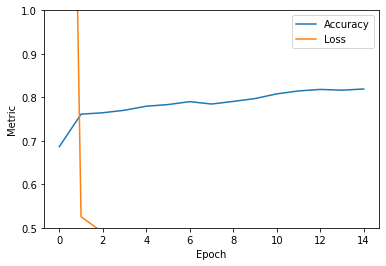

In [32]:
history = model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.ylim([0.5, 1])
plt.show()

# **VGG16**

In [17]:
from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (224, 224)
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

# Create a generator for the training data
train_generator1 = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)

# Create a generator for the test data
test_generator1 = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

Found 3988 validated image filenames belonging to 2 classes.
Found 129 validated image filenames belonging to 2 classes.


In [18]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    model = Model(inputs=conv_base.input, outputs=output_layer)
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [19]:
vgg_model = create_model((224, 224, 3), 2, Adam(learning_rate=0.001), fine_tune=2)

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
tl_checkpoint_2 = ModelCheckpoint(filepath='tl_model_v2.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_2 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
vgg_history = vgg_model.fit(train_generator1,
                            batch_size=64,
                            epochs=10,
                            validation_data=test_generator1,
                            callbacks=[tl_checkpoint_2, early_stop_2],
                            verbose=1)

Epoch 1/10
43/63 [===================>..........] - ETA: 14:11 - loss: 3.2439 - accuracy: 0.5643

In [ ]:
vgg_model.load_weights('tl_model_v2.weights.best.hdf5')

In [ ]:
metrics = vgg_model.evaluate(test_generator1)

In [ ]:
history = vgg_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.ylim([0.5, 1])
plt.show()

# **Resnet**

In [ ]:
image_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

In [ ]:
def resnet(input_shape, n_classes):
  
  def conv_bn_rl(x, f, k=1, s=1, p='same'):
    x = Conv2D(f, k, strides=s, padding=p)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
  
  
  def identity_block(tensor, f):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, tensor])
    output = ReLU()(x)
    return output
  
  
  def conv_block(tensor, f, s):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3, s)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    shortcut = Conv2D(4*f, 1, strides=s)(tensor)
    shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    output = ReLU()(x)
    return output
  
  
  def resnet_block(x, f, r, s=2):
    x = conv_block(x, f, s)
    for _ in range(r-1):
      x = identity_block(x, f)
    return x
    
  
  input = Input(input_shape)
  
  x = conv_bn_rl(input, 64, 7, 2)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = resnet_block(x, 64, 3, 1)
  x = resnet_block(x, 128, 4)
  x = resnet_block(x, 256, 6)
  x = resnet_block(x, 512, 3)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
model = resnet(img_shape,2)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_v3.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_3 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
model_history  = model.fit(train_generator,
                            batch_size=32,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_3, early_stop_3],
                            verbose=1)

In [ ]:
model.load_weights('tl_model_v3.weights.best.hdf5')

In [ ]:
metrics = model.evaluate(test_generator)

In [ ]:
history = model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.ylim([0.5, 1])
plt.show()

# **Mobile** **Net**

In [ ]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
model = mobilenet(img_shape,2)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_4 = ModelCheckpoint(filepath='tl_model_v4.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_4 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
model_history  = model.fit(train_generator,
                            batch_size=32,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_4, early_stop_4],
                            verbose=1)

In [ ]:
model.load_weights('tl_model_v4.weights.best.hdf5')

In [ ]:
metrics = model.evaluate(test_generator)

In [ ]:
history = model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.ylim([0.5, 1])
plt.show()

# **Dense** **Net**

In [ ]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
model = densenet(img_shape,2)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_5 = ModelCheckpoint(filepath='tl_model_v5.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_5 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
model_history  = model.fit(train_generator,
                            batch_size=32,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_5, early_stop_5],
                            verbose=1)

In [ ]:
model.load_weights('tl_model_v5.weights.best.hdf5')

In [ ]:
metrics = model.evaluate(test_generator)

In [ ]:
history = model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.ylim([0.5, 1])
plt.show()

# **Shuffle** **Net**

In [ ]:
def shufflenet(input_shape, n_classes, g=8):
  channels = 384, 769, 1536
  repetitions = 3, 7, 3
  
  def ch_shuffle(x, g):
    _, w, h, ch = K.int_shape(x)
    ch_g = ch // g
    
    def shuffle_op(x):
      x = K.reshape(x, [-1, w, h, ch_g, g])
      x = K.permute_dimensions(x, [0, 1, 2, 4, 3])
      x = K.reshape(x, [-1, w, h, ch])
      return x
    
    x = Lambda(shuffle_op)(x)
    return x


  def gconv(tensor, ch, g):
    _, _, _, in_ch = K.int_shape(tensor)
    ch_g = in_ch // g
    out_ch = ch // g
    group = []
    for i in range(g):
      x = Lambda(lambda x: x[:, :, :, i*ch_g: (i+1)*ch_g])(tensor)
      x = Conv2D(out_ch, 1)(x)
      group.append(x)
    
    x = Concatenate()(group)
    return x
  
  
  def shufflenet_block(tensor, ch, s, g):
    x = gconv(tensor, ch // 4, g)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = ch_shuffle(x, g)
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = gconv(x, ch if s==1 else ch-K.int_shape(tensor)[-1], g)
    x = BatchNormalization()(x)
    
    if s == 1:
      x = Add()([tensor, x])
    else:
      avg = AvgPool2D(3, strides=2, padding='same')(tensor)
      x = Concatenate()([avg, x])


    output = ReLU()(x)
    return output
  
  
  def stage(x, ch, r, g):
    x = shufflenet_block(x, ch, 2, g)
    
    for i in range(r):
      x = shufflenet_block(x, ch, 1, g)
      
    return x
  
  input = Input(input_shape)
  
  x = Conv2D(24, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for ch, r in zip(channels, repetitions):
    x = stage(x, ch, r, g)
    
  x = GlobalAvgPool2D()(x)
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
model = shufflenet(img_shape,2)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_6 = ModelCheckpoint(filepath='tl_model_v6.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_6 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
model_history  = model.fit(train_generator,
                            batch_size=32,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_6, early_stop_6],
                            verbose=1)

In [ ]:
model.load_weights('tl_model_v6.weights.best.hdf5')

In [ ]:
metrics = model.evaluate(test_generator)

In [ ]:
history = model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.ylim([0.5, 1])
plt.show()